<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-08-14 07:31:41--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite.1’

survey-results-publ 100%[===================>] 201.62M  65.0MB/s    in 3.1s    

2025-08-14 07:31:46 (65.0 MB/s) - ‘survey-results-public.sqlite.1’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [3]:
!pip install pandas

In [4]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 162.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 167.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 103.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 177.5 MB/s eta 0:00:00


In [6]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [5]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [6]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [7]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)

                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


In [23]:
# Set max_rows to None to display all rows
pd.set_option('display.max_rows', None)
# Set the option to display all columns
pd.set_option('display.max_columns', None)

query = """select * from main;"""
all_df = pd.read_sql_query(query, conn)

summary_stats = pd.DataFrame({
    "Column name": all_df.columns.to_list(),
    "DataType": all_df.dtypes,
    "Number of rows": all_df.shape[0],
    "Number of columns": all_df.shape[1],
    "Not-Null Count": all_df.notnull().sum(),
    "Missing Count": all_df.isnull().sum(),
    "Missing Percentage": all_df.isnull().mean() * 100
    #"Unique values": [all_df[col].unique() for col in all_df.columns]
})

# unique_vals = pd.DataFrame({
#     "Column name": all_df.columns.to_list(),
#     "Unique values": [all_df[col].unique() for col in all_df.columns]
# })

display(summary_stats)

,Column name,DataType,Number of rows,Number of columns,Not-Null Count,Missing Count,Missing Percentage
ResponseId,ResponseId,int64,65437,114,65437,0,0.000000
MainBranch,MainBranch,object,65437,114,65437,0,0.000000
Age,Age,object,65437,114,65437,0,0.000000
Employment,Employment,object,65437,114,65437,0,0.000000
RemoteWork,RemoteWork,object,65437,114,54806,10631,16.246160
Check,Check,object,65437,114,65437,0,0.000000
CodingActivities,CodingActivities,object,65437,114,54466,10971,16.765744
EdLevel,EdLevel,object,65437,114,60784,4653,7.110656
LearnCode,LearnCode,object,65437,114,60488,4949,7.563000
LearnCodeOnline,LearnCodeOnline,object,65437,114,49237,16200,24.756636


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


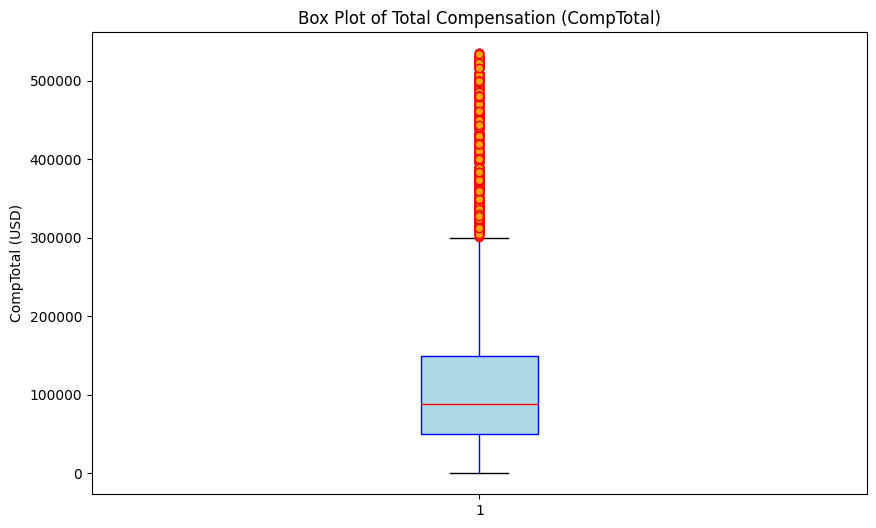

In [39]:
# your code goes here
# 1. Create a connection to the SQLite database named 'survey-results-public.sqlite'
# If the database file does not exist, it will be created automatically
# conn = sqlite3.connect('survey-results-public.sqlite')
# cursor = conn.cursor()

# 2. Write SQL query to select the CompTotal column
query = """select CompTotal from main;"""

# 3. Load the data into a pandas DataFrame
comp_total_df = pd.read_sql_query(query, conn)

# 4. Check the first few rows to make sure data is loaded correctly
#print(comp_total_df.head())

# 5. Convert the CompTotal column to numeric type, coercing errors to NaN
comp_total_df['CompTotal'] = pd.to_numeric(comp_total_df['CompTotal'], errors='coerce')

# 6. Drop NaN values
df_clean = comp_total_df.dropna(subset=['CompTotal'])

# 7. Calculate IQR to find extreme outliers
Q1 = df_clean['CompTotal'].quantile(0.25)
Q3 = df_clean['CompTotal'].quantile(0.75)
IQR = Q3 - Q1

# 8. Define upper bound for normal values
upper_bound = Q3 + 1.5 * IQR

# 9. Separate valid data and extreme outliers
comp_valid = df_clean[df_clean['CompTotal'] <= upper_bound]
comp_anomalies = df_clean[df_clean['CompTotal'] > upper_bound]

# 10. Plot a box plot to analyze distribution and outliers
plt.figure(figsize=(10,6))  # Set the figure size
plt.boxplot(
    comp_valid['CompTotal'],
    vert=True,
    patch_artist=True,
    boxprops=dict(facecolor='lightblue', color='blue'),
    whiskerprops=dict(color='blue'),
    medianprops=dict(color='red'),
    flierprops=dict(marker='o', markerfacecolor='orange', markersize=6, linestyle='none', markeredgecolor='red')
)
plt.title('Box Plot of Total Compensation (CompTotal)')  # Add title
plt.ylabel('CompTotal (USD)')  # Label the Y-axis
plt.show()  # Display the plot

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


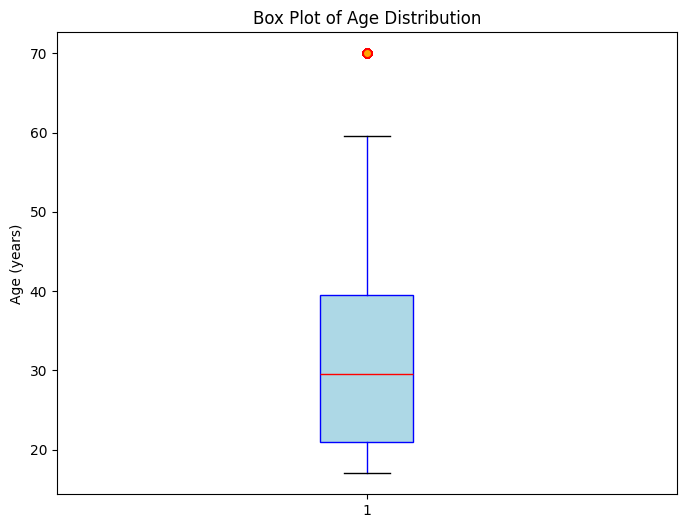

In [41]:
# your code goes here
# 1. Create a connection to the SQLite database named 'survey-results-public.sqlite'
# If the database file does not exist, it will be created automatically
# conn = sqlite3.connect('survey-results-public.sqlite')
# cursor = conn.cursor()

# 2. Write SQL query to select the CompTotal column
query = """select Age from main;"""

# 3. Load the data into a pandas DataFrame
age_df = pd.read_sql_query(query, conn)

# 4. Check the first few rows to make sure data is loaded correctly
#print(comp_total_df.head())

# 5. Map Age groups to numeric values (average age of each group)
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}
age_df['Age_num'] = age_df['Age'].map(age_mapping)

# 6. Drop NaN values (caused by 'Prefer not to say')
df_clean = age_df.dropna(subset=['Age_num'])

# 7. Plot a box plot to analyze distribution
plt.figure(figsize=(8, 6))  # Set the figure size
plt.boxplot(
    df_clean['Age_num'],
    vert=True,
    patch_artist=True,
    boxprops=dict(facecolor='lightblue', color='blue'),
    whiskerprops=dict(color='blue'),
    medianprops=dict(color='red'),
    flierprops=dict(marker='o', markerfacecolor='orange', markersize=6, linestyle='none', markeredgecolor='red')
)
plt.title('Box Plot of Age Distribution')  # Add title
plt.ylabel('Age (years)')  # Label the Y-axis
plt.show()  # Display the plot

### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


/tmp/ipykernel_300/2304477188.py:37: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_clean = comp_age_df.groupby('Age', group_keys=False).apply(remove_outliers)


<Figure size 1200x600 with 0 Axes>

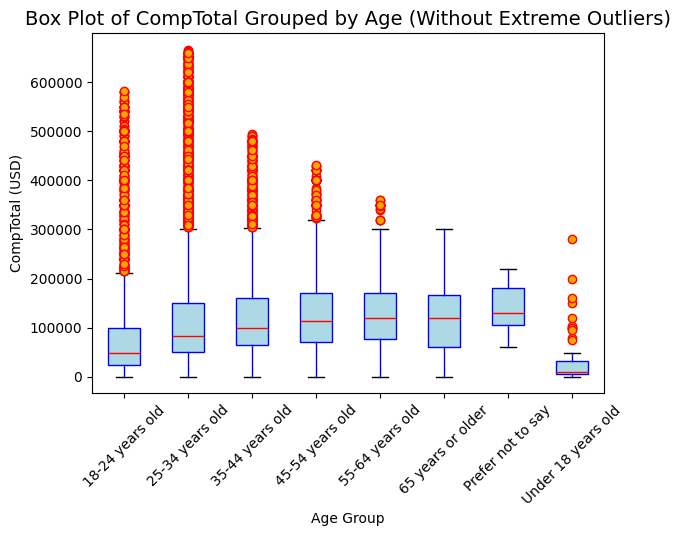

In [45]:
# your code goes here
# 1. Create a connection to the SQLite database named 'survey-results-public.sqlite'
# If the database file does not exist, it will be created automatically
# conn = sqlite3.connect('survey-results-public.sqlite')
# cursor = conn.cursor()

# 2. Write SQL query to select CompTotal and Age columns
query = """
select CompTotal, Age
from main
where age is not null;
"""

# 3. Load the data into a pandas DataFrame
comp_age_df = pd.read_sql_query(query, conn)

# 4. Check the first 5 rows to make sure data is loaded correctly
# print(comp_age_df.head())

# 5. Convert the CompTotal column to numeric type, coercing errors to NaN
comp_age_df['CompTotal'] = pd.to_numeric(comp_age_df['CompTotal'], errors='coerce')

# 6. Drop NaN values in both CompTotal
df_clean = comp_age_df.dropna(subset=['CompTotal'])

# 7. Function to remove outliers using IQR for each group
def remove_outliers(group):
    Q1 = group['CompTotal'].quantile(0.25)   # First quartile
    Q3 = group['CompTotal'].quantile(0.75)   # Third quartile
    IQR = Q3 - Q1                            # Interquartile range
    lower_bound = Q1 - 1.5 * IQR              # Lower bound
    upper_bound = Q3 + 1.5 * IQR              # Upper bound
    # Keep only values within the bounds
    return group[(group['CompTotal'] >= lower_bound) & (group['CompTotal'] <= upper_bound)]

# 8. Apply the outlier removal function to each age group
df_clean = comp_age_df.groupby('Age', group_keys=False).apply(remove_outliers)

# 9. Create a box plot grouped by Age (without extreme outliers)
plt.figure(figsize=(12, 6))
df_clean.boxplot(
    column='CompTotal',
    by='Age',
    grid=False,
    patch_artist=True,
    boxprops=dict(facecolor='lightblue', color='blue'),
    whiskerprops=dict(color='blue'),
    medianprops=dict(color='red'),
    flierprops=dict(marker='o', markerfacecolor='orange', markersize=6, linestyle='none', markeredgecolor='red')
)

plt.title('Box Plot of CompTotal Grouped by Age (Without Extreme Outliers)', fontsize=14)
plt.suptitle('')  # Remove default pandas title
plt.xlabel('Age Group')
plt.ylabel('CompTotal (USD)')
plt.xticks(rotation=45)
plt.show()

**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


/tmp/ipykernel_302/3229289268.py:32: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_clean = sat_df.groupby('JobSatPoints_6', group_keys=False).apply(remove_outliers)


<Figure size 1200x600 with 0 Axes>

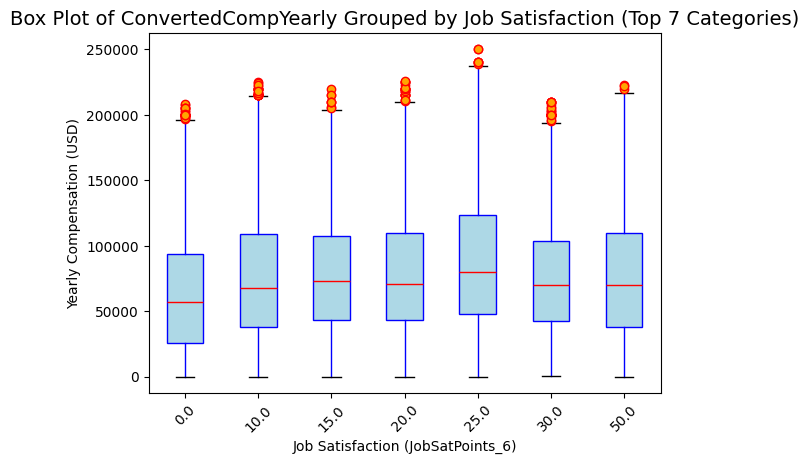

In [13]:
# your code goes here
# 1. Create a connection to the SQLite database named 'survey-results-public.sqlite'
# If the database file does not exist, it will be created automatically
# conn = sqlite3.connect('survey-results-public.sqlite')
# cursor = conn.cursor()

# 2. Write SQL query to select CompTotal and Age columns
query = """
select JobSatPoints_6, ConvertedCompYearly
from main
where JobSatPoints_6 is not null
      and ConvertedCompYearly is not null;
"""

# 3. Load the data into a pandas DataFrame
sat_df = pd.read_sql_query(query, conn)

# 4. Convert salary column to numeric (ensure valid format)
sat_df['ConvertedCompYearly'] = pd.to_numeric(sat_df['ConvertedCompYearly'], errors='coerce')

# 5. Remove outliers using Interquartile Range (IQR)
def remove_outliers(group):
    Q1 = group['ConvertedCompYearly'].quantile(0.25)   # First quartile
    Q3 = group['ConvertedCompYearly'].quantile(0.75)   # Third quartile
    IQR = Q3 - Q1                                      # Interquartile range
    lower_bound = Q1 - 1.5 * IQR                       # Lower bound
    upper_bound = Q3 + 1.5 * IQR                       # Upper bound
    # Keep only values within the bounds
    return group[(group['ConvertedCompYearly'] >= lower_bound) & (group['ConvertedCompYearly'] <= upper_bound)]

# 6. Apply the outlier removal function to each JobSatPoints_6 group
df_clean = sat_df.groupby('JobSatPoints_6', group_keys=False).apply(remove_outliers)

top_categories = df_clean['JobSatPoints_6'].value_counts().nlargest(7).index
df_clean = df_clean[df_clean['JobSatPoints_6'].isin(top_categories)]

# 7. Create a box plot grouped by JobSatPoints_6 (without extreme outliers)
plt.figure(figsize=(12, 6))
df_clean.boxplot(
    column='ConvertedCompYearly',
    by='JobSatPoints_6',
    grid=False,
    patch_artist=True,
    boxprops=dict(facecolor='lightblue', color='blue'),
    whiskerprops=dict(color='blue'),
    medianprops=dict(color='red'),
    flierprops=dict(marker='o', markerfacecolor='orange', markersize=6, linestyle='none', markeredgecolor='red')
)

plt.title('Box Plot of ConvertedCompYearly Grouped by Job Satisfaction (Top 7 Categories)', fontsize=14)
plt.suptitle('')  # Remove default pandas title
plt.xlabel('Job Satisfaction (JobSatPoints_6)')
plt.ylabel('Yearly Compensation (USD)')
plt.xticks(rotation=45)
plt.show()

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


/tmp/ipykernel_302/2884170520.py:35: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_clean = sat_df.groupby('JobSatPoints_6', group_keys=False).apply(remove_outliers)


<Figure size 1200x600 with 0 Axes>

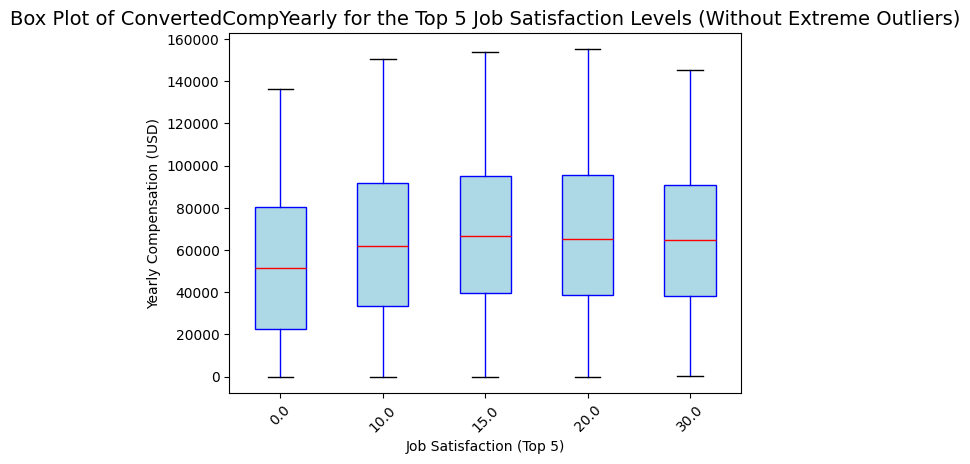

In [20]:
# your code goes here
# 1. Create a connection to the SQLite database named 'survey-results-public.sqlite'
# If the database file does not exist, it will be created automatically
# conn = sqlite3.connect('survey-results-public.sqlite')
# cursor = conn.cursor()

# 2. Write SQL query to select JobSatPoints_6 and ConvertedCompYearly
query = """
select JobSatPoints_6, ConvertedCompYearly
from main
where JobSatPoints_6 is not null
      and ConvertedCompYearly is not null;
"""

# 3. Load the data into a pandas DataFrame
sat_df = pd.read_sql_query(query, conn)

# 4. Convert salary column to numeric (ensure valid format)
sat_df['ConvertedCompYearly'] = pd.to_numeric(sat_df['ConvertedCompYearly'], errors='coerce')

# 5. Keep only TOP-5 most frequent JobSatPoints_6 categories
top_5_categories = sat_df['JobSatPoints_6'].value_counts().nlargest(5).index
sat_df = sat_df[sat_df['JobSatPoints_6'].isin(top_5_categories)]

# 6. Remove outliers using Interquartile Range (IQR)
def remove_outliers(group):
    Q1 = group['ConvertedCompYearly'].quantile(0.25)
    Q3 = group['ConvertedCompYearly'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q1 + 1.5 * IQR
    return group[(group['ConvertedCompYearly'] >= lower_bound) & (group['ConvertedCompYearly'] <= upper_bound)]
    
# 7. Apply the outlier removal function to each JobSatPoints_6 group
df_clean = sat_df.groupby('JobSatPoints_6', group_keys=False).apply(remove_outliers)

# 8. Create a box plot grouped by JobSatPoints_6 (without extreme outliers)
plt.figure(figsize=(12,6))
df_clean.boxplot(
    column='ConvertedCompYearly',
    by='JobSatPoints_6',
    grid=False,
    patch_artist=True,  # Needed to fill boxes with color
    boxprops=dict(facecolor='lightblue', color='blue'),
    whiskerprops=dict(color='blue'),
    medianprops=dict(color='red'),
    flierprops=dict(marker='o', markerfacecolor='orange', markersize=6, linestyle='none', markeredgecolor='red')
)

plt.title('Box Plot of ConvertedCompYearly for the Top 5 Job Satisfaction Levels (Without Extreme Outliers)', fontsize=14)
plt.suptitle('')  # Removes automatic 'ConvertedCompYearly by JobSatPoints_6'
plt.xlabel('Job Satisfaction (Top 5)')
plt.ylabel('Yearly Compensation (USD)')
plt.xticks(rotation=45)
plt.show()


**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


<Figure size 1200x600 with 0 Axes>

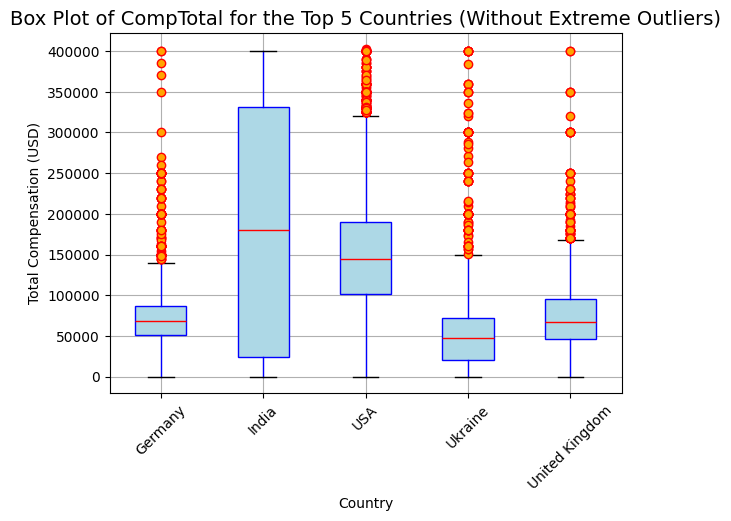

In [22]:
# your code goes here
# 1. Create a connection to the SQLite database named 'survey-results-public.sqlite'
# If the database file does not exist, it will be created automatically
# conn = sqlite3.connect('survey-results-public.sqlite')
# cursor = conn.cursor()

# 2. Write SQL query to select CompTotal and Country
query = """
select CompTotal, Country
from main
where CompTotal is not null
      and Country is not null;
"""

# 3. Load the data into a pandas DataFrame
df = pd.read_sql_query(query, conn)

df['Country'] = df['Country'].replace({
    'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
    'United States of America': 'USA'
})

# 4. Select top 5 countries by response count
top_5_countries = df['Country'].value_counts().nlargest(5).index

# 5. Filter data to include only the top 5 countries
df_top5 = df[df['Country'].isin(top_5_countries)]

# --- 3. Remove extreme outliers using the IQR method ---
Q1 = df_top5['CompTotal'].quantile(0.25)
Q3 = df_top5['CompTotal'].quantile(0.75)
IQR = Q3 - Q1
df_top5 = df_top5[(df_top5['CompTotal'] >= Q1 - 1.5 * IQR) & (df_top5['CompTotal'] <= Q3 + 1.5 * IQR)]

# --- 4. Create the box plot ---
plt.figure(figsize=(12,6))
df_top5.boxplot(
    column='CompTotal',                # Target column for distribution analysis
    by='Country',                       # Group by country
    patch_artist=True,                  # Enable filling color inside boxes
    boxprops=dict(facecolor='lightblue', color='blue'),
    whiskerprops=dict(color='blue'),
    medianprops=dict(color='red'),
    flierprops=dict(marker='o', markerfacecolor='orange', markersize=6, linestyle='none', markeredgecolor='red')
)

# --- 5. Plot formatting ---
plt.title('Box Plot of CompTotal for the Top 5 Countries (Without Extreme Outliers)', fontsize=14)
plt.suptitle('')  # Remove automatic grouping title
plt.xlabel('Country')
plt.ylabel('Total Compensation (USD)')
plt.xticks(rotation=45)
plt.show()

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


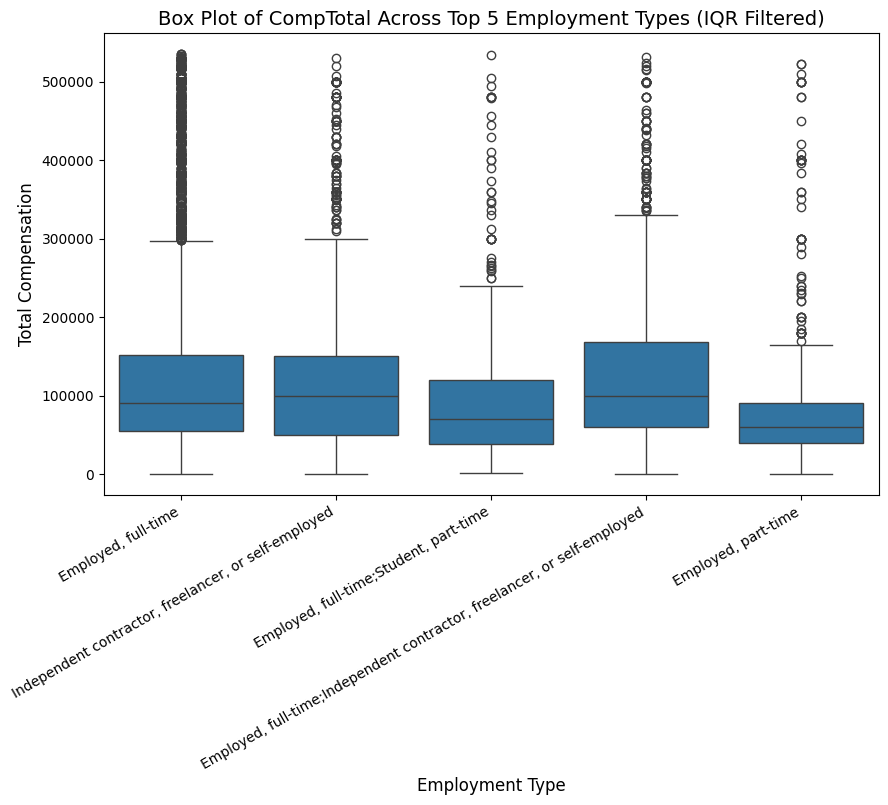

In [28]:
# your code goes here

# 1. Create a connection to the SQLite database named 'survey-results-public.sqlite'
# If the database file does not exist, it will be created automatically
# conn = sqlite3.connect('survey-results-public.sqlite')
# cursor = conn.cursor()

# 2. Write SQL query to select CompTotal and Employment
query = """
select CompTotal, Employment
from main
where CompTotal is not null
      and Employment is not null;
"""

# 3. Load the data into a pandas DataFrame
df = pd.read_sql_query(query, conn)

!pip install seaborn
import seaborn as sns

# 4. Keep only top 5 employment types by frequency
top_5_employment = df['Employment'].value_counts().nlargest(5).index
df = df[df['Employment'].isin(top_5_employment)]

Q1 = df['CompTotal'].quantile(0.25)
Q3 = df['CompTotal'].quantile(0.75)
IQR = Q3 - Q1

df_filtered = df[(df['CompTotal'] >= Q1 - 1.5 * IQR) &
                 (df['CompTotal'] <= Q3 + 1.5 * IQR)]

# 5. Plot box plot
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_filtered,
    x='Employment',
    y='CompTotal'
)

plt.title("Box Plot of CompTotal Across Top 5 Employment Types (IQR Filtered)", fontsize=14)
plt.ylabel("Total Compensation", fontsize=12)
plt.xlabel("Employment Type", fontsize=12)
plt.xticks(rotation=30, ha='right')

#plt.tight_layout()
plt.show()

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


/tmp/ipykernel_302/3801730015.py:29: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_top = df_top.groupby('JobSatPoints_6', group_keys=False).apply(iqr_filter)
/tmp/ipykernel_302/3801730015.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


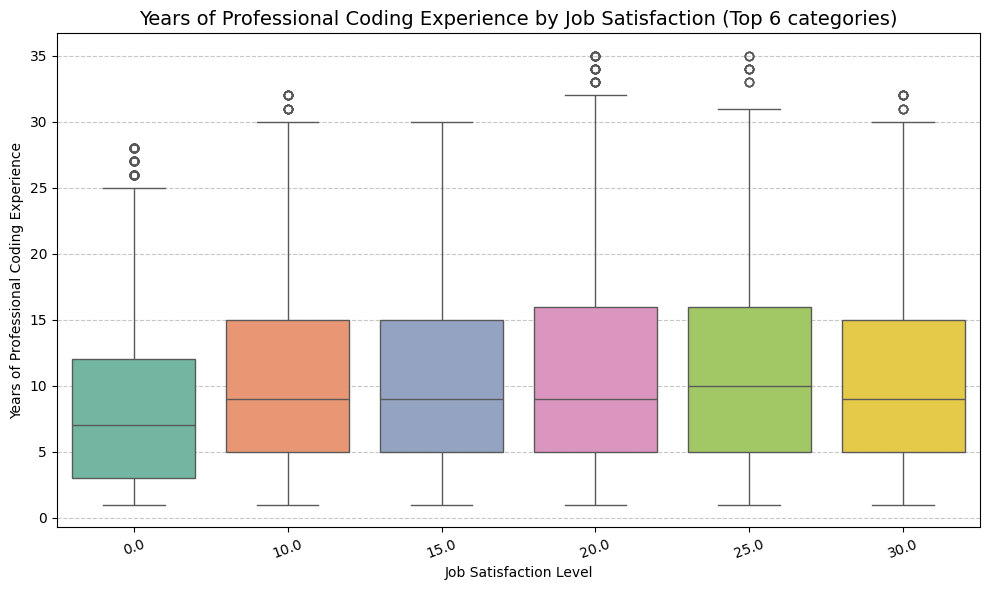

In [30]:
# your code goes here
conn = sqlite3.connect('survey-results-public.sqlite')

query = """
SELECT YearsCodePro, JobSatPoints_6
FROM main
WHERE YearsCodePro IS NOT NULL
      AND JobSatPoints_6 IS NOT NULL;
"""
df = pd.read_sql_query(query, conn)

df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df = df.dropna(subset=['YearsCodePro'])

top_categories = df['JobSatPoints_6'].value_counts().nlargest(6).index
df_top = df[df['JobSatPoints_6'].isin(top_categories)]

Q1 = df_top.groupby('JobSatPoints_6')['YearsCodePro'].quantile(0.25)
Q3 = df_top.groupby('JobSatPoints_6')['YearsCodePro'].quantile(0.75)
IQR = Q3 - Q1

def iqr_filter(subdf):
    cat = subdf.name
    return subdf[
        (subdf['YearsCodePro'] >= Q1[cat] - 1.5 * IQR[cat]) &
        (subdf['YearsCodePro'] <= Q3[cat] + 1.5 * IQR[cat])
    ]

df_top = df_top.groupby('JobSatPoints_6', group_keys=False).apply(iqr_filter)

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_top,
    x='JobSatPoints_6',
    y='YearsCodePro',
    palette='Set2'
)
plt.title("Years of Professional Coding Experience by Job Satisfaction (Top 6 categories)", fontsize=14)
plt.xlabel("Job Satisfaction Level")
plt.ylabel("Years of Professional Coding Experience")
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [31]:
conn.close()
print('Connection closed by Diyor ;)')

Connection closed by Diyor ;)


## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
